In [3]:
#add ../ to the path
import sys
sys.path.append("../")
import numpy as np
import pynbody
from SimInfoDicts.MerianCDM import Sims
from SimInfoDicts.BWMDC import Sims


In [21]:
sim = Sims['elektra']
s = pynbody.load(sim['path'])
s.physical_units()
h = s.halos()



In [23]:
import pathlib
import pickle
import os
import traceback

sys.path.append('../')
# Import the SimInfoDicts package
from SimInfoDicts.sim_type_name import sim_type_name


for t in ['DMShapes','3DShapes']:
    for feedback, use_sim in sim_type_name.items():
        if use_sim:
            pickle_path = f'../PickleFiles/SimulationInfo.{feedback}.pickle'
            if os.path.exists(pickle_path):
                SimInfo = pickle.load(open(pickle_path, 'rb'))
                #add a check to see if the mass file already exists, if it does, we need to make sure it has all the current sims

                for sim in SimInfo:
                    if sim == 'rogue':
                        try:
                            Shapes = pickle.load(open(f'../../Data/{sim}.{feedback}.{t}.pickle','rb'))
                        except FileNotFoundError:
                            print(f'Error loading {sim}.{feedback}.{t}.pickle')
                        try:
                            Profiles = pickle.load(open(f'../../Data/{sim}.{feedback}.Profiles.pickle','rb'))
                        except FileNotFoundError:
                            print(f'Error loading {sim}.{feedback}.Profiles.pickle')
                        for hid in SimInfo[sim]['goodhalos']:
                            try:
                                rbins,ba,ca=Shapes[str(hid)]['rbins'],Shapes[str(hid)]['ba'], Shapes[str(hid)]['ca']
                            except FileNotFoundError:
                                print(f'Error loading {sim}.{feedback}.{t}.pickle')
                        for hid in SimInfo[sim]['goodhalos']:
                            reffs = []
                            print('x000y000')
                            print(Profiles[str(hid)]['x000y000'].keys())
                            print(Profiles[str(hid)]['x000y000'])
                            print('x000y030')
                            print(Profiles[str(hid)]['x000y030'])
                            break
    break
                            
                            # for angle in Profiles[str(hid)].keys():
                            #     try:
                            #         reffs.append(Profiles[str(hid)][str(angle)]['Reff'])
                            #     except:
                            #         print(f'no Reff for {hid} at {angle}')
                            #         #print(angle)
                            #         #print(traceback.format_exc())
                            # print(reffs)

                            

x000y000
dict_keys(['Rhalf', 'sb,v', 'v_lum_den', 'rbins', 'lum_den', 'mags,v', 'binarea', 'Reff'])
{'Rhalf': SimArray(0.88186823, 'kpc'), 'sb,v': SimArray([19.23898275, 19.61385754, 20.00193562, 20.34954853, 20.6349101 ,
          20.87751032, 21.1404001 , 21.37866476, 21.58223313, 21.78408748,
          22.03430989, 22.25092467, 22.39088004, 22.59788137, 22.76910868,
          22.88907916, 23.12848367, 23.40776984, 23.63901718, 23.85549509,
          24.02341232, 24.15153422, 24.32731479, 24.49315749, 24.64830041,
          24.76114609, 24.91117511, 25.09685817, 25.25797386, 25.4180124 ,
          25.5835725 , 25.72982936, 25.91401685, 26.02105344, 26.14147992,
          26.24453369, 26.35738683, 26.49508703, 26.58740586, 26.69739965,
          26.82835376, 26.93694134, 27.07171897, 27.14198667], '1.00e+00'), 'v_lum_den': SimArray([1.09219174e+07, 6.74262361e+06, 4.12111420e+06, 2.61318959e+06,
          1.84513420e+06, 1.39954511e+06, 1.02741959e+06, 7.87668052e+05,
          6.5748

In [22]:
halo = h[1]

In [ ]:
pynbody.analysis.angmom.faceon(halo)

In [42]:

decomp(halo)

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile pot -- this routine assumes the disk is in the x-y plane


0.2296943962574005


<Profile: [<Family gas>, <Family dm>, <Family star>] ; 2D ; log ; ['n', 'v_circ', 'weight_fn', 'phi', 'pot', 'E_circ', 'j_circ']>

In [27]:
frac_disk = len(halo.s[halo.s['decomp']==1])/len(halo.s)
frac_bulge = len(halo.s[halo.s['decomp']==3])/len(halo.s)
frac_halo = len(halo.s[halo.s['decomp']==2])/len(halo.s)
frac_thick = len(halo.s[halo.s['decomp']==4])/len(halo.s)
frac_pbulge = len(halo.s[halo.s['decomp']==5])/len(halo.s)
print(f'Disk fraction: {frac_disk}, Bulge fraction: {frac_bulge:.2f}, Halo fraction: {frac_halo:.2f}, Thick disk fraction: {frac_thick:.2f}, Pseudo bulge fraction: {frac_pbulge:.2f}')
#check fractions add to 1
print(frac_disk+frac_bulge+frac_halo+frac_thick+frac_pbulge)


Disk fraction: 0.0, Bulge fraction: 0.49, Halo fraction: 0.37, Thick disk fraction: 0.13, Pseudo bulge fraction: 0.01
1.0


Fraction of star particles with jz/jcirc ~ 1 +- 0.3: 0.03
Fraction of gas particles with jz/jcirc ~ 1 +- 0.3: 0.12
Fraction of dark matter particles with jz/jcirc ~ 1 +- 0.3: 0.00


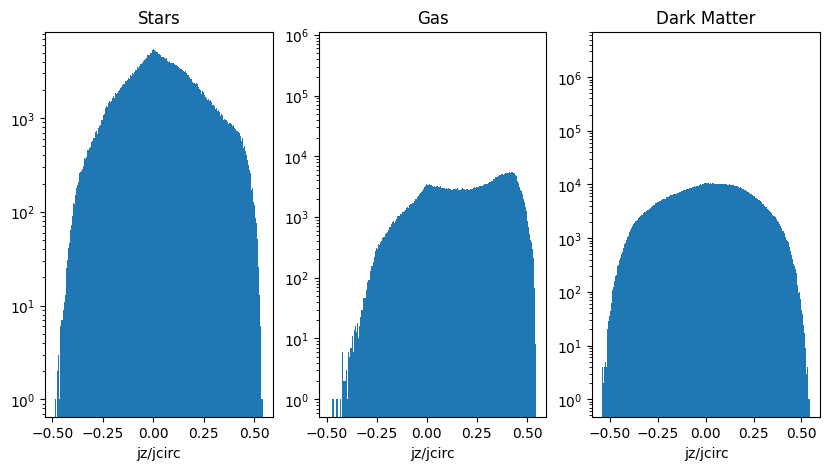

Mean jz/jcirc for stars:       0.04 +- 0.17
Mean jz/jcirc for gas:         0.14 +- 0.18
Mean jz/jcirc for dark matter: 0.01 +- 0.12


In [46]:
jz_jcirc = halo['jz_by_jzcirc']
#get fraction of star and gas particles with jz/jcirc ~ 1 +- 0.1
frac_star = len(halo.s[np.abs(halo.s['jz_by_jzcirc']-.5)<0.1])/len(halo.s)
frac_gas = len(halo.g[np.abs(halo.g['jz_by_jzcirc']-.5)<0.1])/len(halo.g)
print(f'Fraction of star particles with jz/jcirc ~ 1 +- 0.3: {frac_star:.2f}')
print(f'Fraction of gas particles with jz/jcirc ~ 1 +- 0.3: {frac_gas:.2f}')


#for good measure check the fraction of dark matter particles with jz/jcirc ~ 1 +- 0.3
frac_dm = len(halo.dm[np.abs(halo.dm['jz_by_jzcirc']-1)<0.3])/len(halo.dm)
print(f'Fraction of dark matter particles with jz/jcirc ~ 1 +- 0.3: {frac_dm:.2f}')

#make histograms of jz/jcirc for stars and gas 
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize=(10,5))
ax[0].hist(halo.s['jz_by_jzcirc'],bins=500)
ax[0].set_title('Stars')
ax[0].set_xlabel('jz/jcirc')
ax[0].set_yscale('log')

ax[1].hist(halo.g['jz_by_jzcirc'],bins=500)
ax[1].set_title('Gas')
ax[1].set_xlabel('jz/jcirc')
ax[1].set_yscale('log')

ax[2].hist(halo.dm['jz_by_jzcirc'],bins=500)
ax[2].set_title('Dark Matter')
ax[2].set_xlabel('jz/jcirc')
ax[2].set_yscale('log')

plt.show()


#print the mean and std jz/jcirc for each component
print(f'Mean jz/jcirc for stars:       {np.mean(halo.s["jz_by_jzcirc"]):.2f} +- {np.std(halo.s["jz_by_jzcirc"]):.2f}')
print(f'Mean jz/jcirc for gas:         {np.mean(halo.g["jz_by_jzcirc"]):.2f} +- {np.std(halo.g["jz_by_jzcirc"]):.2f}')
print(f'Mean jz/jcirc for dark matter: {np.mean(halo.dm["jz_by_jzcirc"]):.2f} +- {np.std(halo.dm["jz_by_jzcirc"]):.2f}')




In [37]:
mstar = sum(halo.s['mass'])

mdisk = sum(halo.s['mass'][halo.s['decomp']==1])
mthick = sum(halo.s['mass'][halo.s['decomp']==4])
print(mdisk/mstar,mthick/mstar)
dt = (mdisk+mthick)/mstar
print(f'Disk-to-Total ratio: {dt:.2f}')
print(min(halo['jz_by_jzcirc']))

0.0 0.13350273258027764
Disk-to-Total ratio: 0.13
-0.5394251081743126


In [19]:
import os
import pickle
import traceback
from PIL import Image
import matplotlib.pyplot as plt
t_dyn = {}
feedbacks = ['BWMDC','MerianCDM']

for feedback in feedbacks:
    pickle_path = f'../PickleFiles/SimulationInfo.{feedback}.pickle'
    disk_to_total = {}
    

    print(os.path.exists(pickle_path))
    print(pickle_path)
    if os.path.exists(pickle_path):
        sims = pickle.load(open(pickle_path, 'rb'))
        for sim in sims:
            #load sim with pynbody
            try:
                s = pynbody.load(sims[sim]['path'])
                s.physical_units()
                h = s.halos()
                disk_to_total[sim] = {}
                t_dyn[sim] = {}
            except:
                print(f"Error loading simulation {sim}")
                continue

            for hid in sims[sim]['goodhalos']:
                print(f'Working on sim {sim}, halo {hid}')
                halo = h[hid]
                pynbody.analysis.angmom.faceon(halo)
                pynbody.analysis.decomp(halo)
                #get Disk-to-Total Ratio (D/T) for each halo
                disk = halo.s['jz_by_jzcirc'] > 0.7
                stellarMass = sum(halo.s['mass'])
                diskMass = sum(halo.s['mass'][disk])
                dt = diskMass/stellarMass
                #save to pickle file
                disk_to_total[sim][hid] = dt
                print(f'Halo {hid} D/T: {dt:.2f}')
                print(diskMass,stellarMass)
                
                #get dynamical time for each halo at virial radius, and 10th largest stellar radius
                rvir = max(halo.s['r'])
                Mvir = halo['mass'][halo['r']<rvir].sum()
                t_dyn_rvir = calculate_dynamical_time(rvir, Mvir)
                rstar = np.sort(halo.s['r'])[-10]
                M = halo['mass'][halo['r']<rstar].sum()
                t_dyn_rstar = calculate_dynamical_time(rstar, M)
                #store all values into dict
                t_dyn[sim][hid] = {'Mvir': Mvir, 'Rvir': rvir, 't_dyn_rvir': t_dyn_rvir, 'rstar': rstar, 'Mstar': M, 't_dyn_rstar': t_dyn_rstar}
                

                
                pickle.dump(disk_to_total, open(f'../../Data/DiskToTotal.{feedback}.pickle','wb'))
                pickle.dump(t_dyn, open(f'../../Data/DynamicalTime.{feedback}.pickle','wb'))

    

                
                
        
        
            

        

True
../PickleFiles/SimulationInfo.BWMDC.pickle
Working on sim cptmarvel, halo 1


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile pot -- this routine assumes the disk is in the x-y plane


Halo 1 D/T: 0.00
0 54344890.82587707


In [40]:
"""

decomp
======

Tools for bulge/disk/halo decomposition

"""

import logging

import numpy as np

from pynbody import filt, array, util, config
from pynbody.analysis import angmom, profile


logger = logging.getLogger('pynbody.analysis.decomp')


def decomp(h, aligned=False, j_disk_min=0.8, j_disk_max=1.1, E_cut=None, j_circ_from_r=False,
           cen=None, vcen=None, log_interp=False, angmom_size="3 kpc"):
    """
    Creates an array 'decomp' for star particles in the simulation, with an
    integer specifying a kinematic decomposition. The possible values are:

    1 -- thin disk

    2 -- halo

    3 -- bulge

    4 -- thick disk

    5 -- pseudo bulge

    This routine is based on an original IDL procedure by Chris Brook.


    **Parameters:**

    *h* -- the halo to work on

    *j_disk_min* -- the minimum angular momentum as a proportion of
                  the circular angular momentum which a particle must
                  have to be part of the 'disk'

    *j_disk_max* -- the maximum angular momentum as a proportion of
                  the circular angular momentum which a particle can
                  have to be part of the 'disk'

    *E_cut* -- the energy boundary between bulge and spheroid. If
             None, this is taken to be the median energy of the stars.

    *aligned* -- if False, the simulation is recenterd and aligned so
               the disk is in the xy plane as required for the rest of
               the analysis.

    *cen* -- if not None, specifies the center of the halo. Otherwise
           it is found.  This has no effect if aligned=True

    *vcen* -- if not None, specifies the velocity center of the
            halo. Otherwise it is found.  This has no effect if
            aligned=True

    *j_circ_from_r* -- if True, the maximum angular momentum is
    determined as a function of radius, rather than as a function of
    orbital energy. Default False (determine as function of energy).

    *angmom_size* -- the size of the gas sphere used to determine the
     plane of the disk

    """

    import scipy.interpolate as interp
    global config

    # Center, eliminate proper motion, rotate so that
    # gas disk is in X-Y plane
    if not aligned:
        angmom.faceon(h, cen=cen, vcen=vcen, disk_size=angmom_size)

    # Find KE, PE and TE
    ke = h['ke']
    pe = h['phi']

    h['phi'].convert_units(ke.units)  # put PE and TE into same unit system

    te = ke + pe
    h['te'] = te
    te_star = h.star['te']

    te_max = te_star.max()

    # Add an arbitrary offset to the PE to reflect the idea that
    # the group is 'fully bound'.
    te -= te_max
    logger.info("te_max = %.2e" % te_max)

    h['te'] -= te_max

    logger.info("Making disk rotation curve...")

    # Now make a rotation curve for the disk. We'll take everything
    # inside a vertical height of eps*3

    d = h[filt.Disc('1 Mpc', h['eps'].min() * 3)]

    try:

        # attempt to load rotation curve off disk
        r, v_c = np.loadtxt(h.ancestor.filename + ".rot." +
                            str(h.properties["halo_id"]), skiprows=1, unpack=True)

        pro_d = profile.Profile(d, nbins=100, type='log')
        r_me = pro_d["rbins"].in_units("kpc")
        r_x = np.concatenate(([0], r, [r.max() * 2]))
        v_c = np.concatenate(([v_c[0]], v_c, [v_c[-1]]))
        v_c = interp.interp1d(r_x, v_c, bounds_error=False)(r_me)

        logger.info(" - found existing rotation curve on disk, using that")

        v_c = v_c.view(array.SimArray)
        v_c.units = "km s^-1"
        v_c.sim = d

        v_c.convert_units(h['vel'].units)

        pro_d._profiles['v_circ'] = v_c
        pro_d.v_circ_loaded = True

    except Exception:
        pro_d = profile.Profile(d, nbins=100, type='log')  # .D()
        # Nasty hack follows to force the full halo to be used in calculating the
        # gravity (otherwise get incorrect rotation curves)
        pro_d._profiles['v_circ'] = profile.v_circ(pro_d, h)

    pro_phi = pro_d['phi']
    #import pdb; pdb.set_trace()
    # offset the potential as for the te array
    pro_phi -= te_max

    # (will automatically be reflected in E_circ etc)
    # calculating v_circ for j_circ and E_circ is slow

    if j_circ_from_r:
        pro_d.create_particle_array("j_circ", out_sim=h)
        pro_d.create_particle_array("E_circ", out_sim=h)
    else:

        if log_interp:
            j_from_E = interp.interp1d(
                np.log10(-pro_d['E_circ'].in_units(ke.units))[::-1], np.log10(pro_d['j_circ'])[::-1], bounds_error=False)
            h['j_circ'] = 10 ** j_from_E(np.log10(-h['te']))
        else:
            #            j_from_E  = interp.interp1d(-pro_d['E_circ'][::-1], (pro_d['j_circ'])[::-1], bounds_error=False)
            j_from_E = interp.interp1d(
                pro_d['E_circ'].in_units(ke.units), pro_d['j_circ'], bounds_error=False)
            h['j_circ'] = j_from_E(h['te'])

        # The next line forces everything close-to-unbound into the
        # spheroid, as per CB's original script ('get rid of weird
        # outputs', it says).
        h['j_circ'][np.where(h['te'] > pro_d['E_circ'].max())] = np.inf

        # There are only a handful of particles falling into the following
        # category:
        h['j_circ'][np.where(h['te'] < pro_d['E_circ'].min())] = pro_d[
            'j_circ'][0]

    h['jz_by_jzcirc'] = h['j'][:, 2] / h['j_circ']
    h_star = h.star

    if 'decomp' not in h_star:
        h_star._create_array('decomp', dtype=int)
    disk = np.where(
        (h_star['jz_by_jzcirc'] > j_disk_min) * (h_star['jz_by_jzcirc'] < j_disk_max))

    h_star['decomp', disk[0]] = 1
    # h_star = h_star[np.where(h_star['decomp']!=1)]

    # Find disk/spheroid angular momentum cut-off to make spheroid
    # rotational velocity exactly zero.

    V = h_star['vcxy']
    JzJcirc = h_star['jz_by_jzcirc']
    te = h_star['te']

    logger.info("Finding spheroid/disk angular momentum boundary...")

    j_crit = util.bisect(0., 5.0,
                         lambda c: np.mean(V[np.where(JzJcirc < c)]))
    print(j_crit)

    logger.info("j_crit = %.2e" % j_crit)

    if j_crit > j_disk_min:
        logger.warning(
            "!! j_crit exceeds j_disk_min. This is usually a sign that something is going wrong (train-wreck galaxy?)")
        logger.warning("!! j_crit will be reset to j_disk_min=%.2e" % j_disk_min)
        j_crit = j_disk_min

    sphere = np.where(h_star['jz_by_jzcirc'] < j_crit)

    if E_cut is None:
        E_cut = np.median(h_star['te'])

    logger.info("E_cut = %.2e" % E_cut)

    halo = np.where((te > E_cut) * (JzJcirc < j_crit))
    bulge = np.where((te <= E_cut) * (JzJcirc < j_crit))
    pbulge = np.where((te <= E_cut) * (JzJcirc > j_crit)
                      * ((JzJcirc < j_disk_min) + (JzJcirc > j_disk_max)))
    thick = np.where((te > E_cut) * (JzJcirc > j_crit)
                     * ((JzJcirc < j_disk_min) + (JzJcirc > j_disk_max)))

    # h_star['decomp', disk] = 1
    h_star['decomp', halo] = 2
    h_star['decomp', bulge] = 3
    h_star['decomp', thick] = 4
    h_star['decomp', pbulge] = 5

    # Return profile object for informational purposes
    return pro_d


In [35]:
#read in the pickle file
dt = []
t_dyn_vir =[]
t_dyn_star =[]
import pickle
for feedback in ['BWMDC','MerianCDM']:
    file = f'../../Data/BasicData/{feedback}.Masses.pickle'
    mass_dict = pickle.load(open(file,'rb'))
    for sim in mass_dict:
        for hid in mass_dict[sim]:
            dt.append(mass_dict[sim][hid]['disk_to_total'])
            t_dyn_vir.append(mass_dict[sim][hid]['t_dyn_rvir'])
            t_dyn_star.append(mass_dict[sim][hid]['t_dyn_rstar'])
            

In [36]:
print(dt)

{'cptmarvel': {}, 1: 0.0}


In [17]:
print(t_dyn)

{'cptmarvel': {1: {'Mvir': SimArray(8.01266726e+09, 'Msol'), 'Rvir': 20.59838439963972, 't_dyn_rvir': 0.4924104005209183, 'rstar': 6.490021766930929, 'Mstar': SimArray(2.82669782e+09, 'Msol'), 't_dyn_rstar': 0.1466207957127518}}}


In [18]:
#get average, std, range of t_dyn_rvir for all sims

print(f'Mean t_dyn_rvir: {np.mean(t_dyn_rvir):.2f} +- {np.std(t_dyn_rvir):.2f}')
print(f'Min t_dyn_rvir: {np.min(t_dyn_rvir):.2f}, Max t_dyn_rvir: {np.max(t_dyn_rvir):.2f}')
print(f'Mean t_dyn_rstar: {np.mean(t_dyn_rstar):.2f} +- {np.std(t_dyn_rstar):.2f}')
print(f'Min t_dyn_rstar: {np.min(t_dyn_rstar):.2f}, Max t_dyn_rstar: {np.max(t_dyn_rstar):.2f}')


Mean t_dyn_rvir: 0.49 +- 0.00
Min t_dyn_rvir: 0.49, Max t_dyn_rvir: 0.49
Mean t_dyn_rstar: 0.15 +- 0.00
Min t_dyn_rstar: 0.15, Max t_dyn_rstar: 0.15


In [85]:
#inspect pynbody dirs
print(dir(pynbody.gravity.calc))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'all_direct', 'all_pm', 'array', 'config', 'direct', 'eps_as_simarray', 'get_eps', 'math', 'midplane_potential', 'midplane_rot_curve', 'np', 'pm', 'tree', 'treecalc', 'units', 'warnings']


In [161]:
print(sim['goodhalos'])

SyntaxError: incomplete input (1935196138.py, line 1)

In [76]:
Sims['r431']


{'path': '/home/bk639/data/MerianCDM/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096',
 'halos': [1],
 'goodhalos': [1]}

In [ ]:
sim = Sims['cptmarvel']

s = pynbody.load(sim['path'])
s.physical_units()
h = s.halos()
print(len(h[1],len(h[2])))

In [94]:
sim = Sims['cptmarvel']
import pynbody


In [116]:

s = pynbody.load(sim['path'])
s.physical_units()

h_dummy = s.halos(dummy=True)
halos = s.halos()

#load profile
import pickle
Profiles = pickle.load(open('../../Data/cptmarvel.BWMDC.Profiles.pickle','rb'))
ahf_h = pynbody.halo.ahf.AHFCatalogue(s)
ahf_h.physical_units()



pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.
pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.


In [ ]:
#check what properties I can get from each catalog in halo 1

In [1]:
halos[1]

NameError: name 'halos' is not defined

In [117]:
halos[1].properties

{'omegaM0': 0.24,
 'omegaL0': 0.76,
 'h': 0.7299490542599526,
 'boxsize': Unit("2.50e+04 kpc"),
 'a': 1.0000000000142635,
 'time': Unit("1.40e+01 kpc s km**-1"),
 'halo_id': 1}

In [118]:
ahf_h[1].properties

{'omegaM0': 0.24,
 'omegaL0': 0.76,
 'h': 0.7299490542599526,
 'boxsize': Unit("2.50e+04 kpc"),
 'a': 1.0000000000142635,
 'time': Unit("1.40e+01 kpc s km**-1"),
 'halo_id': 1,
 'ID': 7494128790532563721,
 'hostHalo': 0,
 'numSubStruct': 156,
 'mass': 11333600000.0,
 'npart': 2719941,
 'Xc': 9127.20813553,
 'Yc': 7836.42362558,
 'Zc': 9851.41752882,
 'VXc': -25.72,
 'VYc': -39.25,
 'VZc': 33.27,
 'Rvir': 36.53,
 'Rmax': 4.64,
 'r2': 0.75909,
 'mbp_offset': 0.00699,
 'com_offset': 0.39037,
 'Vmax': 43.34,
 'v_esc': 51.672117,
 'sigV': 42.82,
 'lambda': 0.020354,
 'lambdaE': 0.021057,
 'Lx': 0.3247,
 'Ly': -0.4024,
 'Lz': -0.856,
 'b_axis': 0.979615,
 'c_axis': 0.87033,
 'Eax': -0.091573,
 'Eay': 0.599643,
 'Eaz': 0.795011,
 'Ebx': -0.673212,
 'Eby': 0.550999,
 'Ebz': -0.493139,
 'Ecx': 0.733757,
 'Ecy': 0.580369,
 'Ecz': -0.35323,
 'ovdens': 200.0,
 'nbins': 36,
 'fMhires': 1.0,
 'Ekin': 10389900000000.0,
 'Epot': -18483100000000.0,
 'SurfP': -1186040000000.0,
 'Phi0': 7950.62,
 'cNFW':

In [119]:
h_dummy[1].properties

{'omegaM0': 0.24,
 'omegaL0': 0.76,
 'h': 0.7299490542599526,
 'boxsize': Unit("2.50e+04 kpc"),
 'a': 1.0000000000142635,
 'time': Unit("1.40e+01 kpc s km**-1"),
 'halo_id': 1,
 'ID': 7494128790532563721,
 'hostHalo': 0,
 'numSubStruct': 156,
 'mass': 11333600000.0,
 'npart': 2719941,
 'Xc': 9127.20813553,
 'Yc': 7836.42362558,
 'Zc': 9851.41752882,
 'VXc': -25.72,
 'VYc': -39.25,
 'VZc': 33.27,
 'Rvir': 36.53,
 'Rmax': 4.64,
 'r2': 0.75909,
 'mbp_offset': 0.00699,
 'com_offset': 0.39037,
 'Vmax': 43.34,
 'v_esc': 51.672117,
 'sigV': 42.82,
 'lambda': 0.020354,
 'lambdaE': 0.021057,
 'Lx': 0.3247,
 'Ly': -0.4024,
 'Lz': -0.856,
 'b_axis': 0.979615,
 'c_axis': 0.87033,
 'Eax': -0.091573,
 'Eay': 0.599643,
 'Eaz': 0.795011,
 'Ebx': -0.673212,
 'Eby': 0.550999,
 'Ebz': -0.493139,
 'Ecx': 0.733757,
 'Ecy': 0.580369,
 'Ecz': -0.35323,
 'ovdens': 200.0,
 'nbins': 36,
 'fMhires': 1.0,
 'Ekin': 10389900000000.0,
 'Epot': -18483100000000.0,
 'SurfP': -1186040000000.0,
 'Phi0': 7950.62,
 'cNFW':

In [ ]:
for i in [1]:#Sims['cptmarvel']['goodhalos']:
    Reff = Profiles[str(i)]['x000y000']['Reff']
    halo = h[int(i)]
    halo.physical_units()
    m_tot = halo['mass'].sum().in_units('Msol')
    dm_mass = halo.d['mass'].sum().in_units('Msol')
    star_mass = halo.s['mass'].sum().in_units('Msol')
    gas_mass = halo.g['mass'].sum().in_units('Msol')
    print(f'Total mass: {m_tot}')
    print(f'Dark matter mass: {dm_mass}')
    print(f'Stellar mass: {star_mass}')
    print(f'Gas mass: {gas_mass}')
    print(f'Difference: {m_tot - (dm_mass + star_mass + gas_mass)}')


In [150]:
def halos_check(halos,ahf_h):
   
    for i in [2]:
        print(f'Halo {i}:')
        #compare centers 
        ahf_cen = pynbody.array.SimArray([ahf_h[i].properties['Xc'],ahf_h[i].properties['Yc'],ahf_h[i].properties['Zc']],'kpc')
        print(f'Center from AHF: {ahf_cen}')
        
        with pynbody.analysis.halo.center(halos[i],mode='hyb'):
                     #compare virial radii
            print(f'Virial radius from pynbody: {pynbody.analysis.halo.virial_radius(halos[i],overden=200)}')
            print(f'Virial radius from AHF: {ahf_h[i].properties["Rvir"]}')
            #compare massses
            print(f'Mass from pynbody: {halos[i].properties["mass"]}')
            print(f'Mass from AHF: {ahf_h[i].properties["mass"]}')
            
            #print(f'Center from pynbody: {halos[i]['pos'][0]}')
            
            
        print(f'Center from pynbody: {halos[i]['pos'][0].in_units("kpc")}')   
        
halos_check(h,ahf_h)  

Halo 2:
Center from AHF: [8116.03229889 8107.22304862 9633.63900271]
Virial radius from pynbody: 69.26515141251531
Virial radius from AHF: 31.42
Mass from pynbody: 7213730000.0
Mass from AHF: 7213730000.0
Center from pynbody: [  357.82475607   907.62825839 -1091.03143552]


In [149]:
for i in [1,2,3]:
    #units are in kpc/h

    print(h_c)
    ahf_cen = pynbody.array.SimArray([ahf_h[i].properties['Xc']*h_c,ahf_h[i].properties['Yc']*h_c,ahf_h[i].properties['Zc']*h_c],'kpc')
    print(f'Center from AHF: {ahf_cen}')

0.7299490542599526
Center from AHF: [6662.39694656 5720.19001427 7191.03290828]
0.7299490542599526
Center from AHF: [5924.29010092 5917.85979701 7032.06567911]
0.7299490542599526
Center from AHF: [6360.32893115 6267.16562931 7280.6906278 ]


In [71]:
rvir = pynbody.analysis.halo.virial_radius(h[1],overden=300)

In [72]:
rvir

SimArray(60.52741551, 'kpc')

In [ ]:
Reff = pynbody.array.SimArray(Reff, 'kpc')
print(Reff)

pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.


In [101]:
ahf_h[2].properties

{'omegaM0': 0.24,
 'omegaL0': 0.76,
 'h': 0.7299490542599526,
 'boxsize': Unit("2.50e+04 kpc"),
 'a': 1.0000000000142635,
 'time': Unit("1.40e+01 kpc s km**-1"),
 'halo_id': 2,
 'ID': 7430249380296815144,
 'hostHalo': 0,
 'numSubStruct': 105,
 'mass': 7213730000.0,
 'npart': 1878061,
 'Xc': 8116.03229889,
 'Yc': 8107.22304862,
 'Zc': 9633.63900271,
 'VXc': -13.47,
 'VYc': -79.94,
 'VZc': 16.67,
 'Rvir': 31.42,
 'Rmax': 5.57,
 'r2': 19.98018,
 'mbp_offset': 4.55028,
 'com_offset': 1.21254,
 'Vmax': 38.22,
 'v_esc': 44.502447,
 'sigV': 37.02,
 'lambda': 0.030496,
 'lambdaE': 0.030688,
 'Lx': -0.4339,
 'Ly': -0.8333,
 'Lz': 0.3426,
 'b_axis': 0.868299,
 'c_axis': 0.784147,
 'Eax': -0.657146,
 'Eay': 0.731787,
 'Eaz': 0.180686,
 'Ebx': 0.241345,
 'Eby': -0.022817,
 'Ebz': 0.970171,
 'Ecx': 0.714081,
 'Ecy': 0.681152,
 'Ecz': -0.161619,
 'ovdens': 200.0,
 'nbins': 35,
 'fMhires': 0.999666,
 'Ekin': 4944130000000.0,
 'Epot': -8550340000000.0,
 'SurfP': -779382000000.0,
 'Phi0': 5362.86,
 'cN

In [83]:
print(ahf_h[1].properties['mass'])

KeyError: 'mass'

In [67]:
rvir_ahf = ahf_h[2].properties['Rvir']

In [69]:
rvir_ahf = pynbody.array.SimArray(rvir_ahf, 'kpc')
print(rvir_ahf)

31.42


In [70]:
rvir_ahf

SimArray(31.42, 'kpc')

In [64]:
m_vir_within_r, m_star, m_gas, mb_mvir_within_r,HI_within_r = mass_properties_within_r(h[1],rvir_ahf)
m,_,_,_,_ = mass_properties_within_r(h[2],rvir)

1078361 55462 380117
1390927 55462 431672


In [65]:
print(m_vir_within_r, m_star, m_gas, mb_mvir_within_r,HI_within_r)
print(np.log10(mb_mvir_within_r))

7727127421.474011 14920985.364372073 526913293.41465724 0.07012104877075652 nan
-1.1541515969714808


In [66]:
print(ahf_h[2].properties['mass'],m_vir_within_r)
print(f'ahf mass: {ahf_h[2].properties["mass"]:.2e}, calculated mass: {m_vir_within_r:.2e} mass from pynbody: {m:.2e}')

7213730000.0 7727127421.474011
ahf mass: 7.21e+09, calculated mass: 7.73e+09 mass from pynbody: 9.88e+09


In [115]:
for hid in Sims['cptmarvel']['goodhalos']:
    halo = h[hid]
    Reff = Profiles[str(hid)]['x000y000']['Reff']
    Reff = pynbody.array.SimArray(Reff, 'kpc')
    Rvir = ahf_h[hid].properties['Rvir']

    
    cen = pynbody.analysis.angmom.faceon(halo)
    #print(f'py: {cen}, cat: {ahf_h[hid].properties["Xc"]}')
    Rhalf = pynbody.analysis.luminosity.half_light_r(halo)
    Ms = sum(halo.s['mass'][halo.s['r']<Rhalf])
    Mg = sum(halo.g['mass'][halo.g['r']<Rhalf])
    M = sum(halo['mass'][halo['r']<Rhalf])
    #m_vir_within_r, m_star, m_gas, mb_mvir_within_r,HI_within_r = mass_properties_within_r(halo,Reff)
    print(f'Halo {hid}:')
    print((Ms+Mg)/M)
    #print(f'Baryon fraction within Reff: {mb_mvir_within_r:.2f}')


Halo 1:
0.19259994385305454
Halo 2:
0.2614263920771275
Halo 3:
0.24540562804118207
Halo 5:
0.3575942690142185
Halo 6:
0.2691578245245197
Halo 7:
0.15179987897275246
Halo 10:
0.05296496624515258


In [112]:
cen

In [104]:
print(m_vir_within_r, m_star, m_gas, mb_mvir_within_r,HI_within_r)

15131362.664272232 1117043.6166890464 0.0 0.07382306811841738 nan


In [72]:
len(h[1].g)

241590

In [55]:
def mass_properties_within_r(halo, r):
    #halo should be in physcial units, but just in case
    halo.physical_units()

    sphere_filter = pynbody.filt.Sphere(r)
    sphere = halo[sphere_filter]

    m_tot = (sphere['mass'].sum().in_units('Msol'))
    m_gas = (sphere.gas['mass'].sum().in_units('Msol'))
    m_star = (sphere.star['mass'].sum().in_units('Msol'))
    m_dm = (sphere.dm['mass'].sum().in_units('Msol'))
    m_vir_within_r = m_gas + m_star + m_dm
    #print(len(sphere.dm),len(sphere.stars),len(sphere.gas))
    #assert that all of these values are positive, and not close to 0 they are stored as pynbody SimArrays in units of solar masses
    assert m_star > 1, f"Star mass is {m_star}"
    assert m_dm > 1, f"DM mass is {m_dm}"
    #assert that m_tot is the sum of the other masses within floating point error
    assert np.isclose(m_tot, m_vir_within_r, rtol=1e-10), f"Total mass is {m_tot}, sum of components is {m_gas + m_star + m_dm}"




    Mb_within_r = m_gas + m_star
    mb_mvir_within_r = Mb_within_r / m_vir_within_r
    try:
        HI_within_r = (sphere.gas['HI'].sum().in_units('Msol'))
    except:
        HI_within_r = np.copy(m_vir_within_r)*np.nan
        

    return m_vir_within_r, m_star, m_gas, mb_mvir_within_r,HI_within_r